In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

# Number of data points
num_points = 20

# Generate random data points
data_points = {i + 1: (random.uniform(1, 10), random.uniform(1, 10)) for i in range(num_points)}

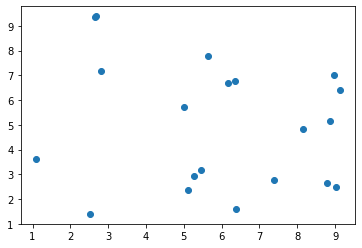

In [3]:
xs = [x for x,_ in data_points.values()]
ys = [y for _,y in data_points.values()]
plt.scatter(xs,ys)

In [4]:
data_points

{1: (2.8118278828817447, 7.161699474045767),
 2: (5.451802482604668, 3.159632905892886),
 3: (6.155477724033878, 6.6758553881503975),
 4: (7.392363037607028, 2.7568085762549215),
 5: (5.000599899700516, 5.708294444712079),
 6: (8.78954869761756, 2.6544461326610453),
 7: (6.364157644798244, 6.76044551007279),
 8: (2.5174197050472085, 1.397351121249968),
 9: (1.0863074173249152, 3.6085252446406484),
 10: (9.01658352033562, 2.471947048671719),
 11: (5.281745660934747, 2.9174498383035243),
 12: (9.134348863738015, 6.388893479667099),
 13: (2.689662616287607, 9.389553016492794),
 14: (8.863349915813979, 5.171125416769353),
 15: (8.973615471326667, 7.000922849516818),
 16: (2.6541030604199034, 9.377949149994013),
 17: (5.113961978280089, 2.361702495819411),
 18: (6.374709256669092, 1.5827950197160578),
 19: (8.142059526467197, 4.810711355823029),
 20: (5.640244725283924, 7.7947017153435025)}

In [5]:
import math

def euclidean_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    distance = math.sqrt((float(x2) - x1)**2 + (y2 - y1)**2)
    return round(distance,2)

In [10]:
def compute_proximity_vals(data): # matrix form
    n = len(data.keys())
    points = list(data.keys())
    prox_vals = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            c1, c2 = points[i], points[j]
            p1 = data[c1]
            p2 = data[c2]
            prox_vals[i][j] = euclidean_distance(p1, p2)
    return prox_vals

In [11]:
import pandas as pd

num_clusters = 0
mat = np.array(list(data_points.values()))
all_elements = list(data_points.keys())

In [12]:
p_v = compute_proximity_vals(data_points)

In [13]:
dissimilarity_matrix = pd.DataFrame(p_v,index=all_elements, columns=all_elements)

In [14]:
dissimilarity_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
1,0.00,4.79,3.38,6.35,2.63,7.49,3.57,5.77,3.95,7.78,4.91,6.37,2.23,6.37,6.16,2.22,5.32,6.62,5.83,2.90
2,4.79,0.00,3.59,1.98,2.59,3.38,3.71,3.42,4.39,3.63,0.30,4.90,6.81,3.96,5.21,6.82,0.87,1.83,3.16,4.64
3,3.38,3.59,0.00,4.11,1.51,4.81,0.23,6.41,5.92,5.09,3.86,2.99,4.40,3.10,2.84,4.42,4.44,5.10,2.72,1.23
4,6.35,1.98,4.11,0.00,3.80,1.40,4.13,5.06,6.36,1.65,2.12,4.03,8.13,2.83,4.53,8.14,2.31,1.55,2.19,5.33
5,2.63,2.59,1.51,3.80,0.00,4.87,1.72,4.97,4.44,5.16,2.80,4.19,4.35,3.90,4.18,4.36,3.35,4.35,3.27,2.18
6,7.49,3.38,4.81,1.40,4.87,0.00,4.77,6.40,7.76,0.29,3.52,3.75,9.09,2.52,4.35,9.10,3.69,2.64,2.25,6.03
7,3.57,3.71,0.23,4.13,1.72,4.77,0.00,6.60,6.15,5.04,3.99,2.79,4.52,2.96,2.62,4.54,4.57,5.18,2.64,1.26
8,5.77,3.42,6.41,5.06,4.97,6.40,6.60,0.00,2.63,6.59,3.15,8.29,7.99,7.38,8.55,7.98,2.77,3.86,6.58,7.12
9,3.95,4.39,5.92,6.36,4.44,7.76,6.15,2.63,0.00,8.01,4.25,8.51,6.00,7.93,8.59,5.98,4.22,5.66,7.16,6.19
10,7.78,3.63,5.09,1.65,5.16,0.29,5.04,6.59,8.01,0.00,3.76,3.92,9.37,2.70,4.53,9.39,3.90,2.79,2.50,6.30


In [33]:
def avg_dissim_within_group_element(ele, element_list):
    sum_dissm = 0
    for i in element_list:
        sum_dissm += dissimilarity_matrix[ele][i]   
        
    if(len(element_list)>1):
        avg = sum_dissm/(len(element_list)-1)
    else: 
        avg = 0
    return avg

def avg_dissim_across_group_element(ele, main_list, splinter_list):
    if len(splinter_list) == 0:
        return 0
    sum_dissm = 0
    for j in splinter_list:
        sum_dissm += dissimilarity_matrix[ele][j]
    avg = sum_dissm/(len(splinter_list))
    return avg
    
    
def splinter(main_list, splinter_group):
    most_dissm_object_value = -np.inf
    most_dissm_object_index = None
    for ele in main_list:
        x = avg_dissim_within_group_element(ele, main_list)
        y = avg_dissim_across_group_element(ele, main_list, splinter_group)
        diff= x -y
        if diff > most_dissm_object_value:
            most_dissm_object_value = diff
            most_dissm_object_index = ele
    if(most_dissm_object_value>0):
        return  (most_dissm_object_index, 1)
    else:
        return (-1, -1)
    
def split(element_list):
    main_list = element_list
    splinter_group = []    
    (most_dissm_object_index,flag) = splinter(main_list, splinter_group) # a single point to be moved
    while(flag > 0):
        main_list.remove(most_dissm_object_index)
        splinter_group.append(most_dissm_object_index)
        (most_dissm_object_index,flag) = splinter(element_list, splinter_group)
    
    return (main_list, splinter_group)

def max_diameter(cluster_list):
    max_diameter_cluster_index = None
    max_diameter_cluster_value = -np.inf
    index = 0
    for element_list in cluster_list:
        for i in element_list:
            for j in element_list:
                if dissimilarity_matrix[i][j]  > max_diameter_cluster_value:
                    max_diameter_cluster_value = dissimilarity_matrix[i][j]
                    max_diameter_cluster_index = index
        
        index +=1
    
    if(max_diameter_cluster_value <= 0):
        return -1
    
    return max_diameter_cluster_index

In [34]:
current_clusters = ([all_elements])
level = 1
index = 0
while(index!=-1):
    print(level, current_clusters)
    (a_clstr, b_clstr) = split(current_clusters[index])
    del current_clusters[index]
    current_clusters.append(a_clstr)
    current_clusters.append(b_clstr)
    index = max_diameter(current_clusters)
    level +=1


print(level, current_clusters)

1 [[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]]
2 [[3, 4, 6, 9, 10, 13, 14, 17, 20], [2, 16, 8, 1, 12, 11, 19, 5, 7, 18, 15]]
3 [[3, 4, 6, 9, 10, 13, 14, 17, 20], [16, 8, 1, 12, 11, 19, 5, 7, 18, 15], [2]]
4 [[16, 8, 1, 12, 11, 19, 5, 7, 18, 15], [2], [3, 4, 6, 13, 14, 17, 20], [10, 9]]
5 [[2], [3, 4, 6, 13, 14, 17, 20], [10, 9], [16, 8, 1, 12, 11, 19, 5], [15, 7, 18]]
6 [[2], [10, 9], [16, 8, 1, 12, 11, 19, 5], [15, 7, 18], [3, 4, 6, 20], [14, 13, 17]]
7 [[2], [10, 9], [16, 8, 1, 12, 11, 19, 5], [15, 7, 18], [14, 13, 17], [4, 6, 20], [3]]
8 [[2], [10, 9], [16, 8, 1, 12, 11, 19, 5], [15, 7, 18], [4, 6, 20], [3], [13, 17], [14]]
9 [[2], [10, 9], [15, 7, 18], [4, 6, 20], [3], [13, 17], [14], [1, 12, 11, 19, 5], [16, 8]]
10 [[2], [15, 7, 18], [4, 6, 20], [3], [13, 17], [14], [1, 12, 11, 19, 5], [16, 8], [9], [10]]
11 [[2], [4, 6, 20], [3], [13, 17], [14], [1, 12, 11, 19, 5], [16, 8], [9], [10], [15, 7], [18]]
12 [[2], [4, 6, 20], [3], [13, 17], [14], [16, 8], [